In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned_data.csv")
df.head()

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,...,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1000,1.71,23.6,86.2,248.0,78.0,111.0,N,...,Low,N,INTERMEDIARY,171.000,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7000,1.69,41.6,82.5,162.0,50.0,135.0,Y,...,High,Y,HIGH,169.000,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,46.0,86.6145,1.83,25.9,106.7,103.0,73.0,114.0,N,...,High,Y,INTERMEDIARY,183.000,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3000,1.80,33.4,96.6,134.0,46.0,91.0,N,...,High,Y,INTERMEDIARY,175.694,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5000,1.86,28.8,102.7,146.0,64.0,141.0,Y,...,High,N,INTERMEDIARY,186.000,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           1529 non-null   object 
 1   Age                           1529 non-null   float64
 2   Weight (kg)                   1529 non-null   float64
 3   Height (m)                    1529 non-null   float64
 4   BMI                           1529 non-null   float64
 5   Abdominal Circumference (cm)  1529 non-null   float64
 6   Total Cholesterol (mg/dL)     1529 non-null   float64
 7   HDL (mg/dL)                   1529 non-null   float64
 8   Fasting Blood Sugar (mg/dL)   1529 non-null   float64
 9   Smoking Status                1529 non-null   object 
 10  Diabetes Status               1529 non-null   object 
 11  Physical Activity Level       1529 non-null   object 
 12  Family History of CVD         1529 non-null   object 
 13  CVD

In [4]:
df.isnull().sum()

Sex                             0
Age                             0
Weight (kg)                     0
Height (m)                      0
BMI                             0
Abdominal Circumference (cm)    0
Total Cholesterol (mg/dL)       0
HDL (mg/dL)                     0
Fasting Blood Sugar (mg/dL)     0
Smoking Status                  0
Diabetes Status                 0
Physical Activity Level         0
Family History of CVD           0
CVD Risk Level                  0
Height (cm)                     0
Waist-to-Height Ratio           0
Systolic BP                     0
Diastolic BP                    0
Blood Pressure Category         0
Estimated LDL (mg/dL)           0
CVD Risk Score                  0
dtype: int64

In [5]:
print(df.describe())

               Age  Weight (kg)   Height (m)          BMI  \
count  1529.000000  1529.000000  1529.000000  1529.000000   
mean     46.973185    85.954355     1.754150    28.265598   
std      12.101985    20.448650     0.110583     7.685139   
min      25.000000    50.100000     1.502000    13.600000   
25%      37.000000    67.970000     1.670000    22.000000   
50%      46.000000    86.614500     1.755000    27.800000   
75%      55.000000   104.100000     1.840000    33.700000   
max      79.000000   120.000000     2.000000    51.000000   

       Abdominal Circumference (cm)  Total Cholesterol (mg/dL)  HDL (mg/dL)  \
count                   1529.000000                1529.000000  1529.000000   
mean                      91.741942                 198.465664    56.187050   
std                       12.835949                  56.397607    15.640566   
min                       70.000000                 100.000000    30.000000   
25%                       80.456000                 151

### 1. Basic demographic and lifestyle characteristics of individuals
 - To understand population structure, balance, and potential risk factors.

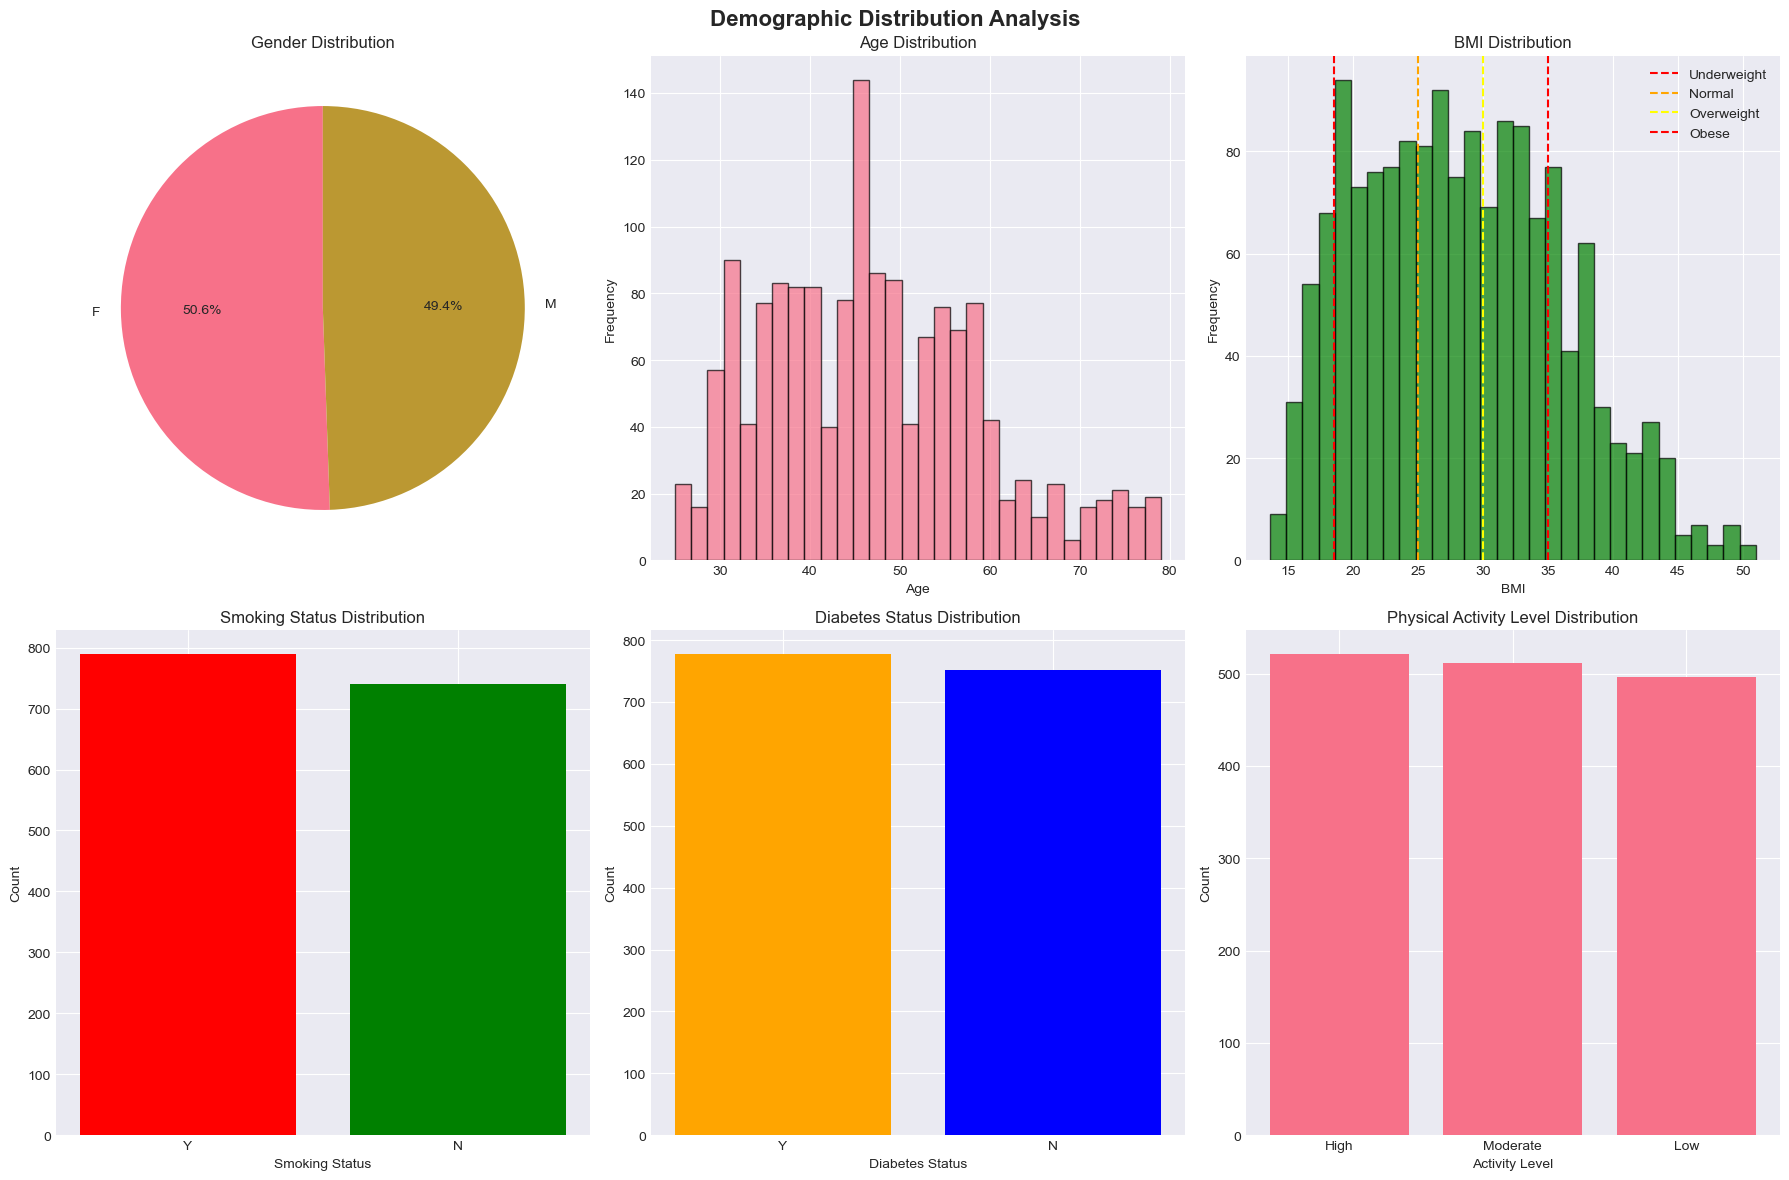

In [6]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Subplots for demographic features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Demographic Distribution Analysis', fontsize=16, fontweight='bold')

# 1.1 Sex Distribution
sex_counts = df['Sex'].value_counts()
axes[0, 0].pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Gender Distribution')

# 1.2 Age Distribution
axes[0, 1].hist(df['Age'].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Age Distribution')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

# 1.3 BMI Distribution
axes[0, 2].hist(df['BMI'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='green')
axes[0, 2].axvline(x=18.5, color='red', linestyle='--', label='Underweight')
axes[0, 2].axvline(x=25, color='orange', linestyle='--', label='Normal')
axes[0, 2].axvline(x=30, color='yellow', linestyle='--', label='Overweight')
axes[0, 2].axvline(x=35, color='red', linestyle='--', label='Obese')
axes[0, 2].set_title('BMI Distribution')
axes[0, 2].set_xlabel('BMI')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].legend()

# 1.4 Smoking Status
smoking_counts = df['Smoking Status'].value_counts()
axes[1, 0].bar(smoking_counts.index, smoking_counts.values, color=['red', 'green'])
axes[1, 0].set_title('Smoking Status Distribution')
axes[1, 0].set_xlabel('Smoking Status')
axes[1, 0].set_ylabel('Count')

# 1.5 Diabetes Status
diabetes_counts = df['Diabetes Status'].value_counts()
axes[1, 1].bar(diabetes_counts.index, diabetes_counts.values, color=['orange', 'blue'])
axes[1, 1].set_title('Diabetes Status Distribution')
axes[1, 1].set_xlabel('Diabetes Status')
axes[1, 1].set_ylabel('Count')

# 1.6 Physical Activity Level
activity_counts = df['Physical Activity Level'].value_counts()
axes[1, 2].bar(activity_counts.index, activity_counts.values)
axes[1, 2].set_title('Physical Activity Level Distribution')
axes[1, 2].set_xlabel('Activity Level')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Insights
* Gender-balanced
* Middle-aged population
* High overweight/obesity prevalence
* Significant smoking & diabetes presence
* Mixed physical activity levels


### 2. Clinical Parameters Analysis

Exploratory analysis was performed on key clinical parameters, including blood pressure, cholesterol levels, blood sugar, lipid profiles, and waist-to-height ratio, to assess overall health status, identify clinical risk thresholds, and detect patterns that may influence disease risk assessment and predictive model performance.

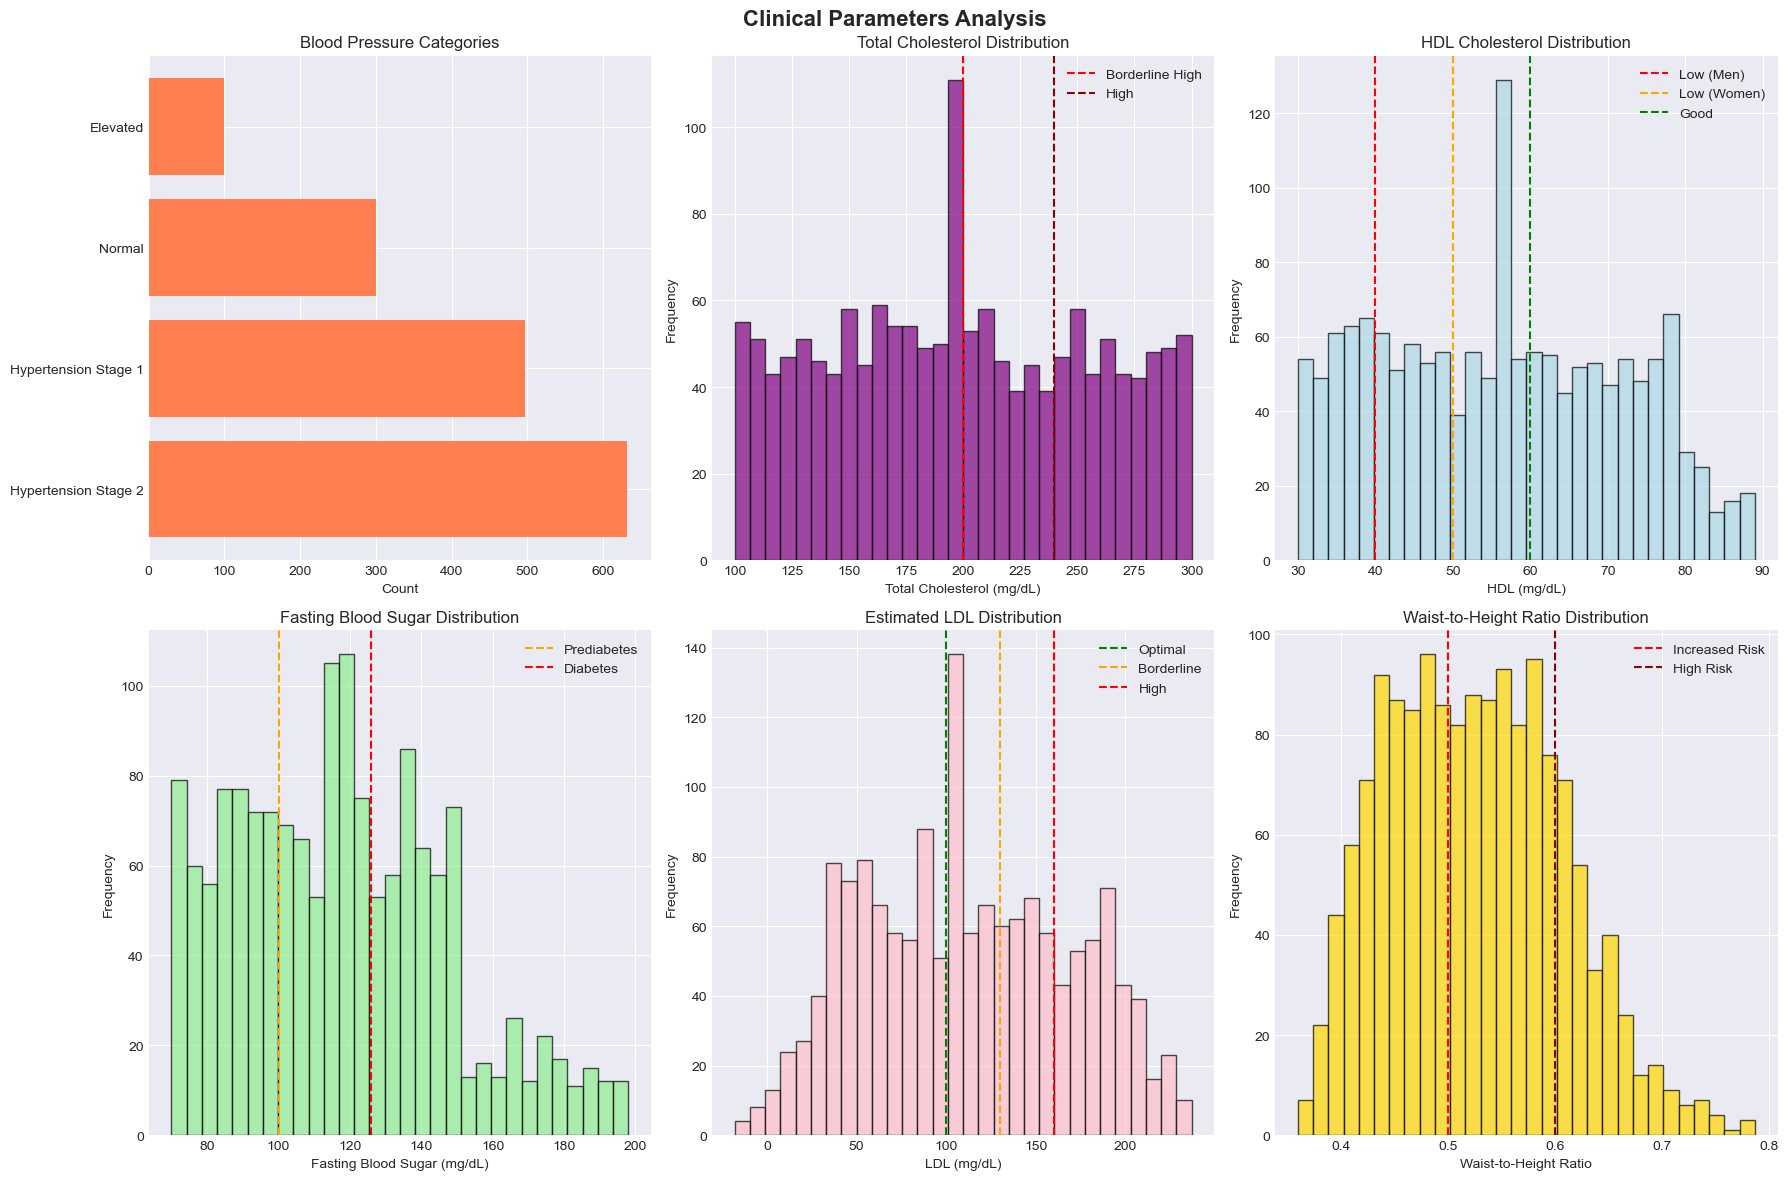

In [7]:
# Clinical parameters analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Clinical Parameters Analysis', fontsize=16, fontweight='bold')

# 2.1 Blood Pressure Categories
bp_categories = df['Blood Pressure Category'].value_counts()
axes[0, 0].barh(bp_categories.index, bp_categories.values, color='coral')
axes[0, 0].set_title('Blood Pressure Categories')
axes[0, 0].set_xlabel('Count')

# 2.2 Total Cholesterol Distribution
axes[0, 1].hist(df['Total Cholesterol (mg/dL)'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='purple')
axes[0, 1].axvline(x=200, color='red', linestyle='--', label='Borderline High')
axes[0, 1].axvline(x=240, color='darkred', linestyle='--', label='High')
axes[0, 1].set_title('Total Cholesterol Distribution')
axes[0, 1].set_xlabel('Total Cholesterol (mg/dL)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# 2.3 HDL Distribution
axes[0, 2].hist(df['HDL (mg/dL)'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='lightblue')
axes[0, 2].axvline(x=40, color='red', linestyle='--', label='Low (Men)')
axes[0, 2].axvline(x=50, color='orange', linestyle='--', label='Low (Women)')
axes[0, 2].axvline(x=60, color='green', linestyle='--', label='Good')
axes[0, 2].set_title('HDL Cholesterol Distribution')
axes[0, 2].set_xlabel('HDL (mg/dL)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].legend()

# 2.4 Fasting Blood Sugar Distribution
axes[1, 0].hist(df['Fasting Blood Sugar (mg/dL)'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].axvline(x=100, color='orange', linestyle='--', label='Prediabetes')
axes[1, 0].axvline(x=126, color='red', linestyle='--', label='Diabetes')
axes[1, 0].set_title('Fasting Blood Sugar Distribution')
axes[1, 0].set_xlabel('Fasting Blood Sugar (mg/dL)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# 2.5 LDL Distribution
axes[1, 1].hist(df['Estimated LDL (mg/dL)'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='pink')
axes[1, 1].axvline(x=100, color='green', linestyle='--', label='Optimal')
axes[1, 1].axvline(x=130, color='orange', linestyle='--', label='Borderline')
axes[1, 1].axvline(x=160, color='red', linestyle='--', label='High')
axes[1, 1].set_title('Estimated LDL Distribution')
axes[1, 1].set_xlabel('LDL (mg/dL)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

# 2.6 Waist-to-Height Ratio
axes[1, 2].hist(df['Waist-to-Height Ratio'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='gold')
axes[1, 2].axvline(x=0.5, color='red', linestyle='--', label='Increased Risk')
axes[1, 2].axvline(x=0.6, color='darkred', linestyle='--', label='High Risk')
axes[1, 2].set_title('Waist-to-Height Ratio Distribution')
axes[1, 2].set_xlabel('Waist-to-Height Ratio')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

### Overall Clinical Insights
* High prevalence of hypertension
* Elevated cholesterol & LDL levels
* Significant low HDL risk
* Large prediabetic & diabetic population
* High central obesity risk

### 3. CVD Risk Analysis

Examine the distribution of cardiovascular disease (CVD) risk levels and scores, assess the influence of family history, and analyze how CVD risk varies with key factors such as age, BMI, and total cholesterol, providing insights to support risk stratification and predictive modeling.

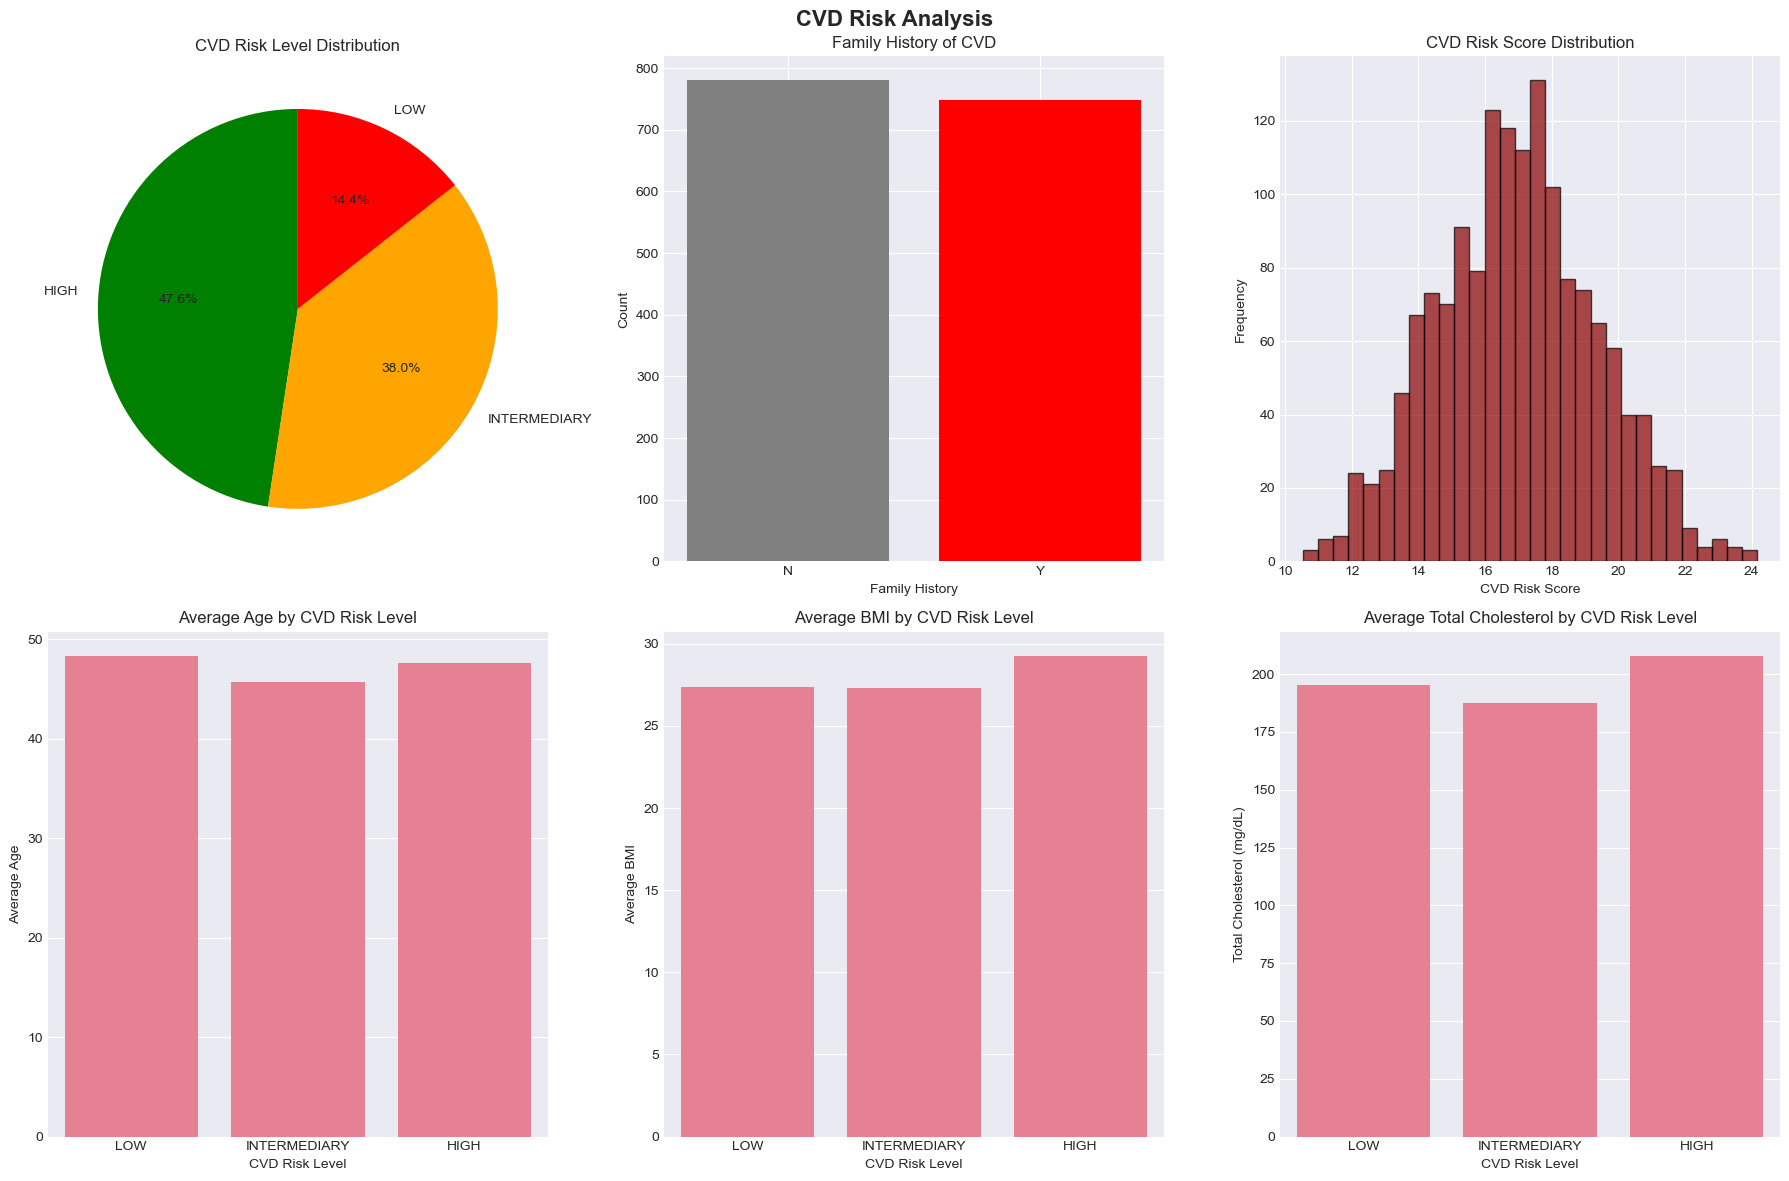

In [13]:
# CVD Risk Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('CVD Risk Analysis', fontsize=16, fontweight='bold')

# 3.1 CVD Risk Level Distribution
risk_counts = df['CVD Risk Level'].value_counts()
colors = ['green', 'orange', 'red']
axes[0, 0].pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%', 
                colors=colors, startangle=90)
axes[0, 0].set_title('CVD Risk Level Distribution')

# 3.2 Family History of CVD
family_counts = df['Family History of CVD'].value_counts()
axes[0, 1].bar(family_counts.index, family_counts.values, color=['gray', 'red'])
axes[0, 1].set_title('Family History of CVD')
axes[0, 1].set_xlabel('Family History')
axes[0, 1].set_ylabel('Count')

# 3.3 CVD Risk Score Distribution
axes[0, 2].hist(df['CVD Risk Score'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='darkred')
axes[0, 2].set_title('CVD Risk Score Distribution')
axes[0, 2].set_xlabel('CVD Risk Score')
axes[0, 2].set_ylabel('Frequency')

# 3.4 CVD Risk vs Age
risk_age_data = df[['CVD Risk Level', 'Age']].dropna()
risk_order = ['LOW', 'INTERMEDIARY', 'HIGH']

sns.barplot(
    data=risk_age_data,
    x='CVD Risk Level',
    y='Age',
    order=risk_order,
    estimator='mean',
    errorbar=None,
    ax=axes[1, 0]
)
axes[1, 0].set_title('Average Age by CVD Risk Level')
axes[1, 0].set_xlabel('CVD Risk Level')
axes[1, 0].set_ylabel('Average Age')


# 3.5 CVD Risk vs BMI
risk_bmi_data = df[['CVD Risk Level', 'BMI']].dropna()
sns.barplot(
    data=risk_bmi_data,
    x='CVD Risk Level',
    y='BMI',
    order=risk_order,
    estimator='mean',
    errorbar=None,
    ax=axes[1, 1]
)
axes[1, 1].set_title('Average BMI by CVD Risk Level')
axes[1, 1].set_xlabel('CVD Risk Level')
axes[1, 1].set_ylabel('Average BMI')

# 3.6 CVD Risk vs Cholesterol
risk_chol_data = df[['CVD Risk Level', 'Total Cholesterol (mg/dL)']].dropna()
sns.barplot(
    data=risk_chol_data,
    x='CVD Risk Level',
    y='Total Cholesterol (mg/dL)',
    order=risk_order,
    estimator='mean',
    errorbar=None,
    ax=axes[1, 2]
)
axes[1, 2].set_title('Average Total Cholesterol by CVD Risk Level')
axes[1, 2].set_xlabel('CVD Risk Level')
axes[1, 2].set_ylabel('Total Cholesterol (mg/dL)')
plt.tight_layout()
plt.show()


### Insights
* Most individuals are high or intermediate risk
* Risk increases with age, BMI, and cholesterol

### 4. Correlation Analysis

Correlation analysis was performed on numerical clinical variables to identify the strength and direction of relationships between features, detect multicollinearity, and highlight variables with strong associations that may influence feature selection and predictive model performance.

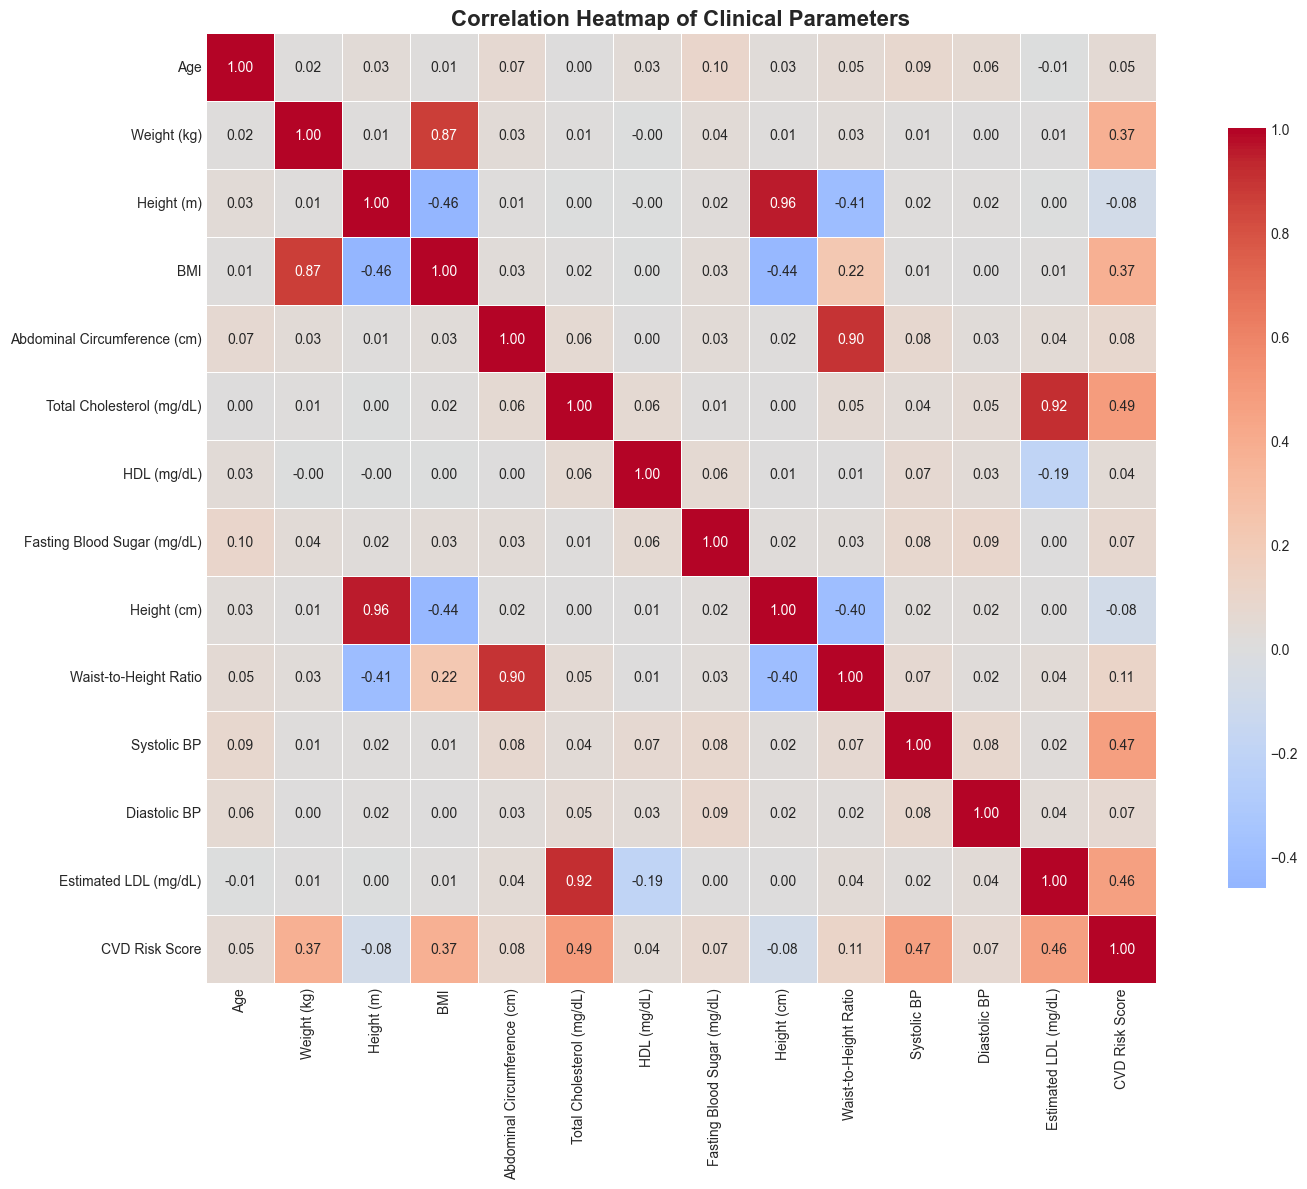

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            center=0,square=True, linewidths=.5, 
            cbar_kws={"shrink": .8},fmt='.2f')

plt.title('Correlation Heatmap of Clinical Parameters', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Insights 
* The correlation heatmap reveals strong interrelationships among obesity-related and lipid-related parameters, such as weight, BMI, abdominal circumference, and cholesterol measures. 
* Moderate positive correlations are observed between CVD risk score and total cholesterol, LDL, systolic blood pressure, and BMI, indicating their significant contribution to cardiovascular risk. 
* Weak correlations for individual variables highlight the multifactorial nature of cardiovascular disease.

### 5. Statistical Comparison by CVD Risk Level

A grouped statistical analysis was performed to compute mean values of key clinical parameters across CVD risk levels. This comparison highlights how age, BMI, cholesterol, blood sugar, and risk scores vary with increasing cardiovascular risk, providing clear quantitative evidence to support risk stratification and guide feature importance in predictive modeling.

In [ ]:
# Statistical summary by CVD Risk Level
risk_groups = df.groupby('CVD Risk Level')

# Calculated means for key parameters
summary_stats = risk_groups.agg({
    'Age': 'mean',
    'BMI': 'mean',
    'Total Cholesterol (mg/dL)': 'mean',
    'HDL (mg/dL)': 'mean',
    'Fasting Blood Sugar (mg/dL)': 'mean',
    'CVD Risk Score': 'mean'
}).round(2)

print("Statistical Summary by CVD Risk Level:")
print(summary_stats)
print("\n" + "="*60 + "\n")

Statistical Summary by CVD Risk Level:
                  Age    BMI  Total Cholesterol (mg/dL)  HDL (mg/dL)  \
CVD Risk Level                                                         
HIGH            47.58  29.28                     208.02        53.44   
INTERMEDIARY    45.69  27.33                     187.64        57.97   
LOW             48.35  27.38                     195.45        60.57   

                Fasting Blood Sugar (mg/dL)  CVD Risk Score  
CVD Risk Level                                               
HIGH                                 117.06           17.61  
INTERMEDIARY                         115.48           16.13  
LOW                                  123.49           17.01  




* BMI and cholesterol increase with risk
* HDL decreases as risk increases
* Age and sugar alone are not decisive
* Cardiovascular risk is multifactorial

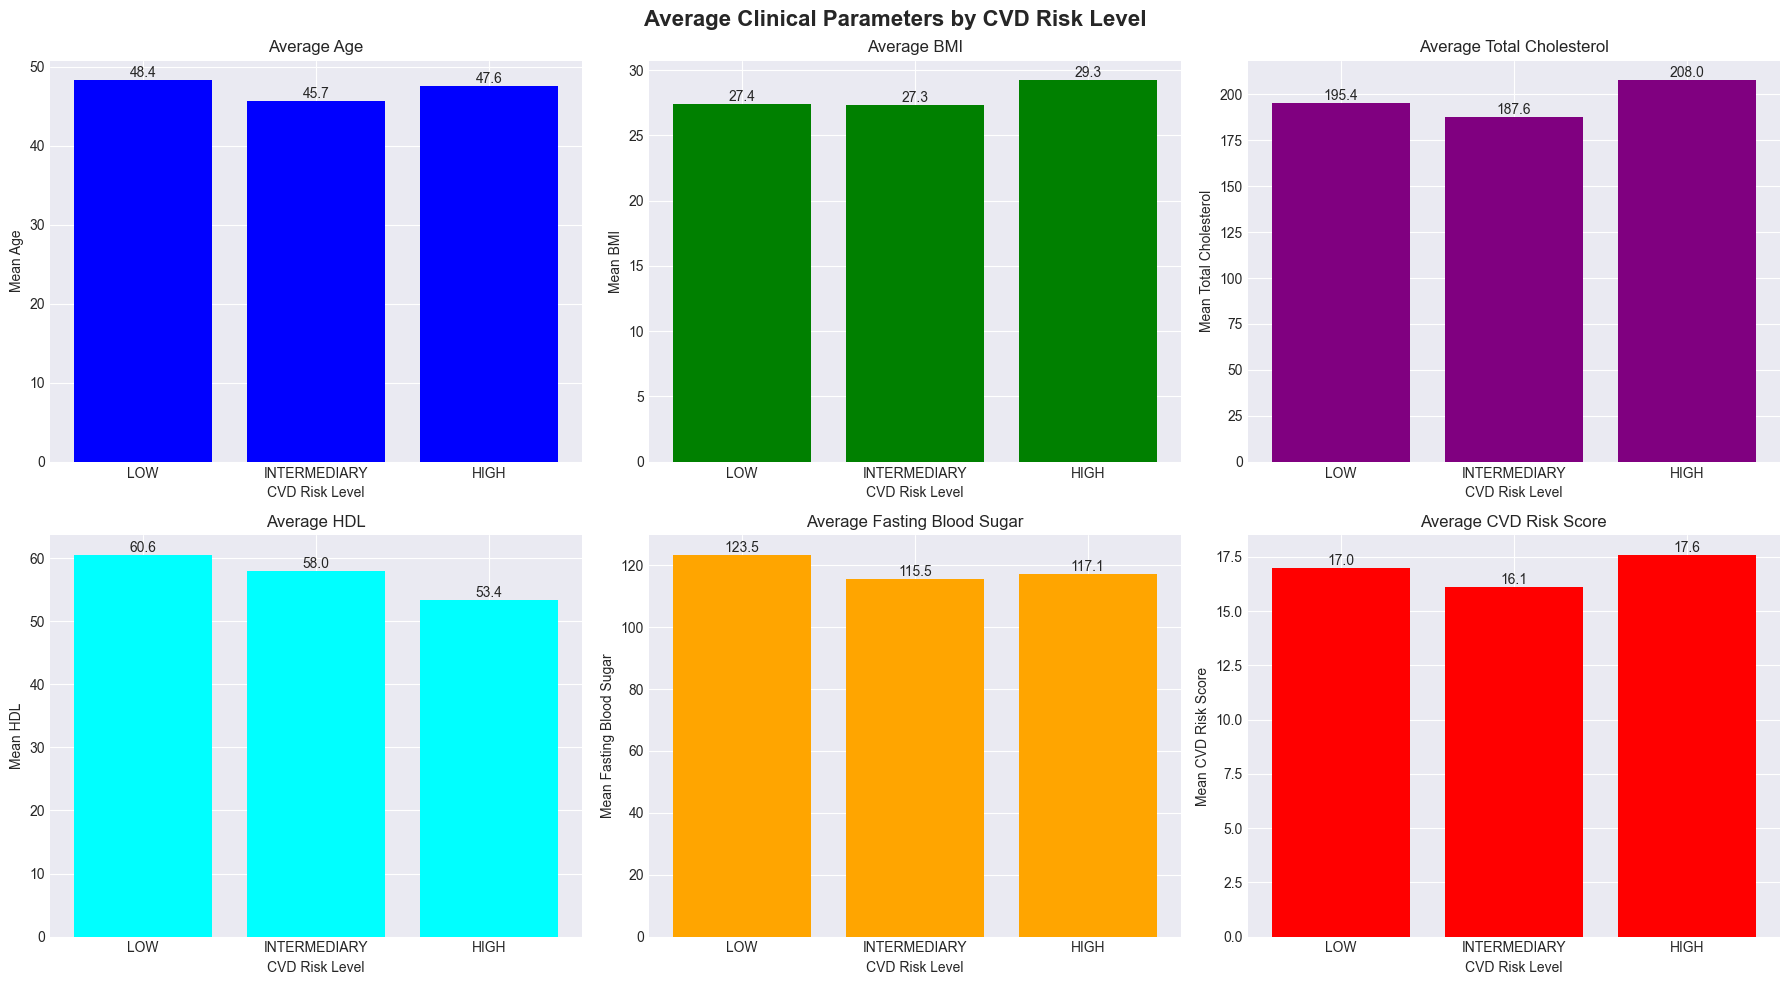

In [ ]:
# Bar chart for comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Average Clinical Parameters by CVD Risk Level', fontsize=16, fontweight='bold')

parameters = ['Age', 'BMI', 'Total Cholesterol (mg/dL)', 
              'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)', 'CVD Risk Score']
titles = ['Age', 'BMI', 'Total Cholesterol', 'HDL', 'Fasting Blood Sugar', 'CVD Risk Score']
colors = ['blue', 'green', 'purple', 'cyan', 'orange', 'red']

for idx, (param, title, color) in enumerate(zip(parameters, titles, colors)):
    row = idx // 3
    col = idx % 3
    
    # Sort by risk level
    sorted_data = summary_stats[param].reindex(['LOW', 'INTERMEDIARY', 'HIGH'])
    
    bars = axes[row, col].bar(sorted_data.index, sorted_data.values, color=color)
    axes[row, col].set_title(f'Average {title}')
    axes[row, col].set_ylabel(f'Mean {title}')
    axes[row, col].set_xlabel('CVD Risk Level')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Insights 
* The bar chart comparison of average clinical parameters shows that high cardiovascular risk is strongly associated with elevated BMI and total cholesterol levels, along with reduced HDL cholesterol. 
* While age and fasting blood sugar display variability across risk groups, these parameters alone do not dictate risk classification, reinforcing the multifactorial nature of cardiovascular disease.

### 6. Gender-Based Analysis of CVD Risk Factors

Gender-wise exploratory analysis was conducted to compare the distribution of key clinical and risk-related parameters across males and females. This analysis helps identify gender-specific variations in cardiovascular risk factors and supports more informed interpretation and modeling of CVD risk.


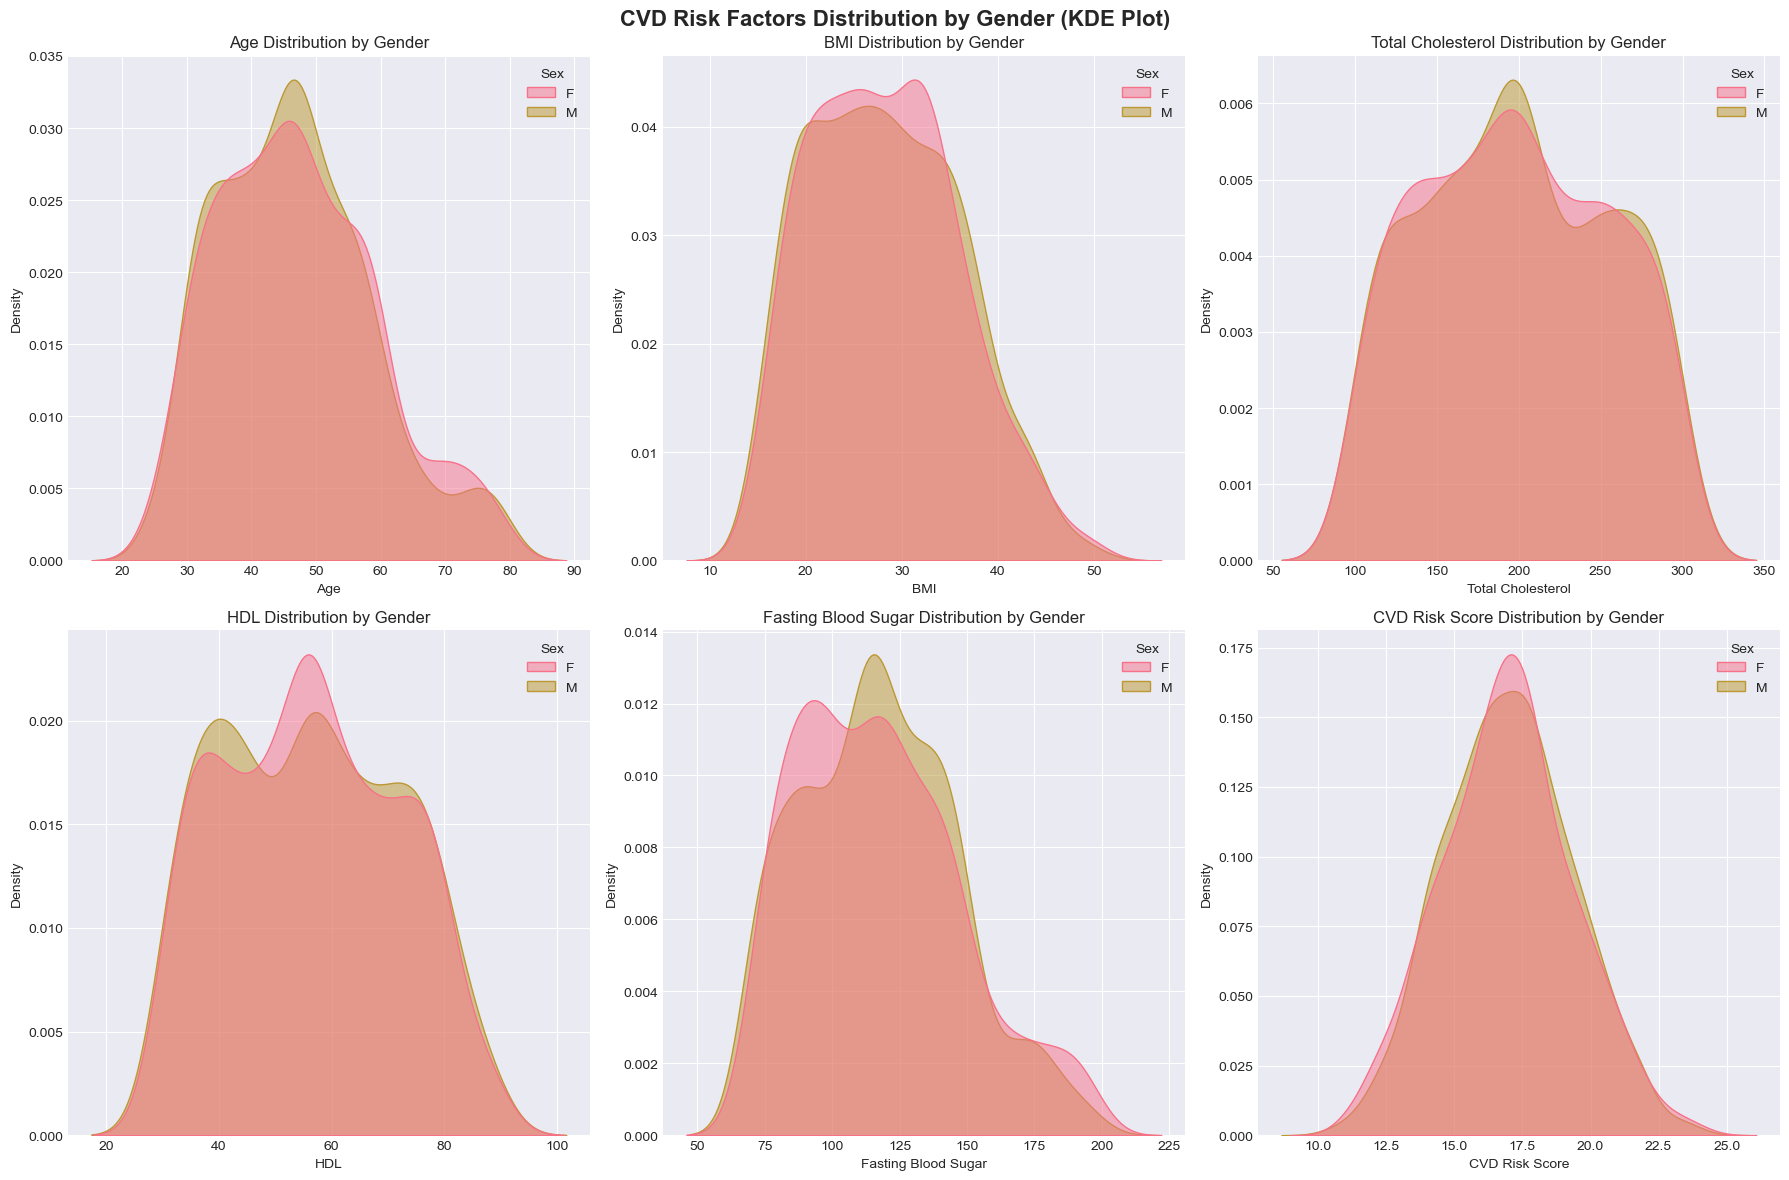

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('CVD Risk Factors Distribution by Gender (KDE Plot)', fontsize=16, fontweight='bold')

for idx, (param, title) in enumerate(zip(gender_params, param_titles)):
    row = idx // 3
    col = idx % 3

    sns.kdeplot(
        data=df.dropna(subset=[param, 'Sex']),
        x=param,
        hue='Sex',
        fill=True,
        common_norm=False,
        alpha=0.5,
        ax=axes[row, col]
    )

    axes[row, col].set_title(f'{title} Distribution by Gender')
    axes[row, col].set_xlabel(title)
    axes[row, col].set_ylabel('Density')

plt.tight_layout()
plt.show()


### Insights
* Most CVD risk factors show **similar distributions** for males and females.
* Females generally have **higher HDL cholesterol**.
* Males tend to have **slightly higher fasting blood sugar**, which may affect CVD risk.


### 7. Final Summary and Output Generation

The analyzed summary statistics were saved for documentation, and a consolidated visualization was generated to present the overall CVD risk distribution and the most influential features correlated with the CVD risk score. This final summary provides a concise overview of key findings and supports interpretation, reporting, and subsequent predictive modeling.


Summary statistics saved to 'cvd_risk_summary_statistics.csv'


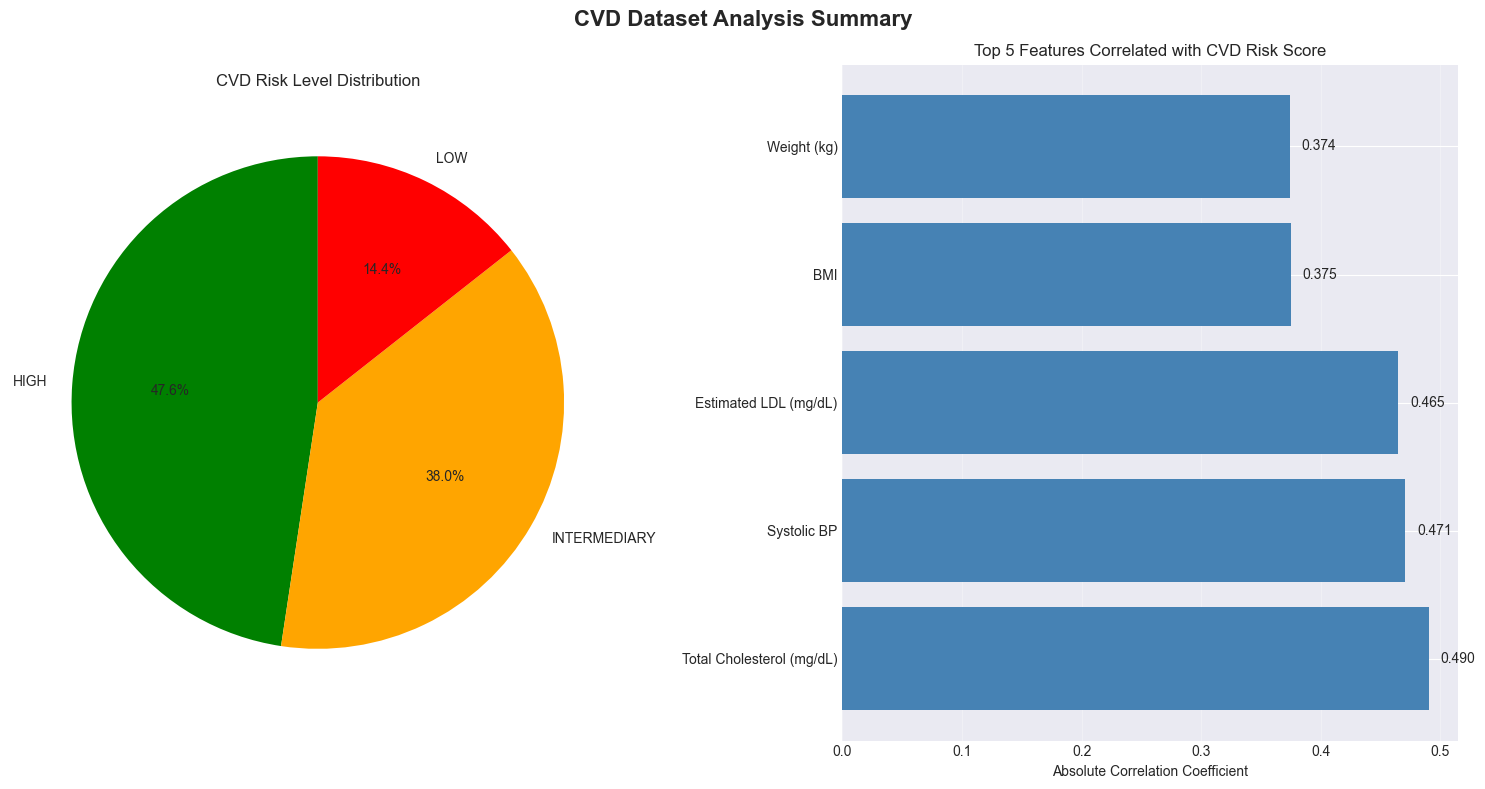

In [ ]:
# Save summary statistics to CSV
summary_stats.to_csv('cvd_risk_summary_statistics.csv')
print("Summary statistics saved to 'cvd_risk_summary_statistics.csv'")

# Final summary figure
fig = plt.figure(figsize=(15, 8))

ax1 = plt.subplot(121)
risk_proportions = df['CVD Risk Level'].value_counts(normalize=True) * 100
colors = ['green', 'orange', 'red']
ax1.pie(risk_proportions.values, labels=risk_proportions.index, 
        autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('CVD Risk Level Distribution')
ax2 = plt.subplot(122)

# Top 5 most correlated features with CVD Risk Score
if 'CVD Risk Score' in numeric_df.columns:
    correlations = numeric_df.corr()['CVD Risk Score'].abs().sort_values(ascending=False)
    top_correlations = correlations[1:6]  
    
    ax2.barh(top_correlations.index, top_correlations.values, color='steelblue')
    ax2.set_xlabel('Absolute Correlation Coefficient')
    ax2.set_title('Top 5 Features Correlated with CVD Risk Score')
    ax2.grid(axis='x', alpha=0.3)
    
    for i, (index, value) in enumerate(zip(top_correlations.index, top_correlations.values)):
        ax2.text(value + 0.01, i, f'{value:.3f}', va='center')

plt.suptitle('CVD Dataset Analysis Summary', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('cvd_analysis_summary.png', dpi=300, bbox_inches='tight')
plt.show()

### Final Summary
* The final summary indicates that a large proportion of the population falls within intermediate to high cardiovascular risk categories. 
* Correlation analysis identifies total cholesterol, systolic blood pressure, LDL cholesterol, BMI, and body weight as the most influential contributors to the CVD risk score. 